In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers
import datetime
%matplotlib inline

Using TensorFlow backend.


In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [21]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [22]:
X_train.shape

(60000, 784)

In [23]:
X_test.shape

(10000, 784)

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X_train)
pca_train_data = pca.transform(X_train)
pca_test_data = pca.transform(X_test)

In [40]:
pca_train_data.shape

(60000, 100)

In [41]:
pca_train_data = pca_train_data.reshape(pca_train_data.shape[0],10,10,1)
pca_test_data = pca_test_data.reshape(pca_test_data.shape[0],10,10,1)

In [42]:
my_input=layers.Input(shape=(10,10,1))
conv1=layers.Conv2D (64,3,activation='relu', padding='same',strides=1)(my_input)
pool1=layers.MaxPool2D(pool_size=2)(conv1)
conv2=layers.Conv2D (64,3,activation='relu', padding='same',strides=1)(pool1)
pool2=layers.MaxPool2D(pool_size=2)(conv2)
flat=layers.Flatten()(pool2)
out=layers.Dense(10,activation = 'softmax')(flat)

myModel=Model(my_input,out)

myModel.summary()
myModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [43]:
start=datetime.datetime.now()
trained_model=myModel.fit(pca_train_data,y_train , batch_size=32 , epochs=5 , validation_split=0.2)
end=datetime.datetime.now()
Total_time_training=end-start

print ('Total_time_training:',Total_time_training )

history=trained_model.history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 20s 411us/step - loss: 0.5848 - acc: 0.7979 - val_loss: 0.4456 - val_acc: 0.8433
Epoch 2/5
48000/48000 [==============================] - 18s 377us/step - loss: 0.4054 - acc: 0.8541 - val_loss: 0.4055 - val_acc: 0.8545
Epoch 3/5
48000/48000 [==============================] - 19s 385us/step - loss: 0.3649 - acc: 0.8693 - val_loss: 0.3825 - val_acc: 0.8625
Epoch 4/5
48000/48000 [==============================] - 20s 412us/step - loss: 0.3377 - acc: 0.8775 - val_loss: 0.3779 - val_acc: 0.8658
Epoch 5/5
48000/48000 [==============================] - 17s 344us/step - loss: 0.3156 - acc: 0.8852 - val_loss: 0.3807 - val_acc: 0.8657
Total_time_training: 0:01:33.161613


10000/10000 [==============================] - 2s 203us/step


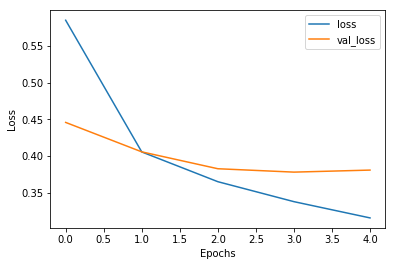

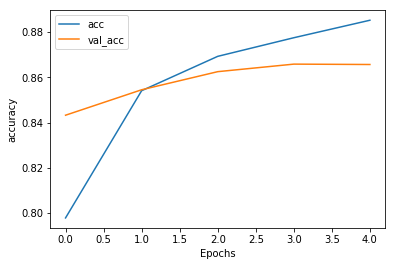

In [44]:
losses=history['loss']
val_losses=history['val_loss']
ac=history['acc']
val_ac=history['val_acc']

import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(ac)
plt.plot(val_ac)
plt.legend(['acc','val_acc'])

# =============================================================================
# 
# Evaluation
# =============================================================================

predicted_labels=myModel.predict(pca_test_data)
#plt.imshow (test_images[0],cmap='binary')
test_loss,test_acc=myModel.evaluate(pca_test_data,y_test)

In [45]:
print('loss = ',test_loss,'acc = ',test_acc)

loss =  0.4048381613016129 acc =  0.856
